<a href="https://colab.research.google.com/github/aymanxp/house_prices_prediction_using_xgboost_regressor/blob/main/house_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal :** Predict the sales price for each house.


**Metric :**
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# **Easiest way to download kaggle data in Google Colab [Click here](https://https://www.kaggle.com/discussions/general/74235)**

In [102]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions                      Student Performance Predictions                      9KB  2024-08-17 06:57:57           7331        162  0.9411765        
berkayalan/paris-2024-olympics-medals                             Paris 2024 Olympics Medals                           1KB  2024-08-14 11:02:45           5986        106  1.0              
lainguyn123/student-performance-factors                           Student Performance Factors                         94KB  2024-09-02 10:53:57           1346         36  1.0          

In [103]:
#Download Data :
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [104]:
! mkdir house-prices-advanced-regression-techniques
! unzip house-prices-advanced-regression-techniques.zip -d house-prices-advanced-regression-techniques

mkdir: cannot create directory ‘house-prices-advanced-regression-techniques’: File exists
Archive:  house-prices-advanced-regression-techniques.zip
replace house-prices-advanced-regression-techniques/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
replace house-prices-advanced-regression-techniques/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
replace house-prices-advanced-regression-techniques/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices-advanced-regression-techniques/test.csv  
replace house-prices-advanced-regression-techniques/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices-advanced-regression-techniques/train.csv  


In [105]:
! rm -rf house-prices-advanced-regression-techniques.zip

#**Exploring the Dataset**

In [106]:
# To get familiar with our Dataset check out data_description.txt file inside the house_prices.. Directory
f = open("house-prices-advanced-regression-techniques/data_description.txt", "r")
file_content = f.read()
print(file_content)
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [107]:
# Importing libs:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
try :
  import category_encoders
except :
  ! pip install category_encoders
  import category_encoders

In [108]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [110]:
print(f"Train dataset shape : {train_df.shape}")
print(f"Test dataset shape : {test_df.shape}")

Train dataset shape : (1460, 81)
Test dataset shape : (1459, 80)


In [111]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [113]:
# Number of features in the Dataset :
print(f"Number of features in the Dataset : {len(train_df.columns)}")

Number of features in the Dataset : 81


In [114]:
nan_v_price = train_df.SalePrice.isna().sum()
nan_v_price

0

In [115]:
# What is the length of our train & test dataset :
print(f"Train dataset length : {len(train_df)}, Test dataset length : {len(test_df)}")

Train dataset length : 1460, Test dataset length : 1459


# **Handling missing values in the Dataset**


In [116]:
train_miss_vals_cols = train_df.columns[train_df.isna().any()].tolist()
test_miss_vals_cols = test_df.columns[test_df.isna().any()].tolist()
print(f"Number of columns with missing values in train dataset : {len(train_miss_vals_cols)}")
print(f"Number of columns with missing values in test dataset : {len(test_miss_vals_cols)}")

Number of columns with missing values in train dataset : 19
Number of columns with missing values in test dataset : 33


In [117]:
# Removing columns with hight number of missing values
for train_col in train_miss_vals_cols.copy() :
  if train_df[train_col].isna().sum() > 600 :
    train_df.drop(train_col, axis=1, inplace=True)
    train_miss_vals_cols.remove(train_col)
for test_col in test_miss_vals_cols.copy() :
  if test_df[test_col].isna().sum() > 600 :
    test_df.drop(test_col, axis=1, inplace=True)
    test_miss_vals_cols.remove(test_col)

In [118]:
# Filling missing values in columns of type int or float with the mean
for train_col in train_miss_vals_cols.copy() :
  if train_df[train_col].dtype == "int64" or  train_df[train_col].dtype == "float64" :
    train_df[train_col].fillna(train_df[train_col].mean(), inplace=True)
    train_miss_vals_cols.remove(train_col)

for test_col in test_miss_vals_cols.copy() :
  if test_df[test_col].dtype == "int64" or  test_df[test_col].dtype == "float64" :
    test_df[test_col].fillna(test_df[test_col].mean(), inplace=True)
    test_miss_vals_cols.remove(test_col)

print(f"Number of columns with missing values in train dataset : {len(train_miss_vals_cols)}")
print(f"Number of columns with missing values in test dataset : {len(test_miss_vals_cols)}")

Number of columns with missing values in train dataset : 10
Number of columns with missing values in test dataset : 16


In [119]:
# Print out the number of missing values in each colum :
print("Train Dataset: ")
for train_col in train_miss_vals_cols :
  print(f"Number of missing values in {train_col} : {train_df[train_col].isna().sum()}")

print("Test Dataset: ")
for test_col in test_miss_vals_cols :
  print(f"Number of missing values in {test_col} : {test_df[test_col].isna().sum()}")



Train Dataset: 
Number of missing values in BsmtQual : 37
Number of missing values in BsmtCond : 37
Number of missing values in BsmtExposure : 38
Number of missing values in BsmtFinType1 : 37
Number of missing values in BsmtFinType2 : 38
Number of missing values in Electrical : 1
Number of missing values in GarageType : 81
Number of missing values in GarageFinish : 81
Number of missing values in GarageQual : 81
Number of missing values in GarageCond : 81
Test Dataset: 
Number of missing values in MSZoning : 4
Number of missing values in Utilities : 2
Number of missing values in Exterior1st : 1
Number of missing values in Exterior2nd : 1
Number of missing values in BsmtQual : 44
Number of missing values in BsmtCond : 45
Number of missing values in BsmtExposure : 44
Number of missing values in BsmtFinType1 : 42
Number of missing values in BsmtFinType2 : 42
Number of missing values in KitchenQual : 1
Number of missing values in Functional : 2
Number of missing values in GarageType : 76
Nu

 Notice that now we have less number of missing values in each colum, to handill them we will use a method called : **Most frequent Imputation**

In [120]:
# Most Frequent Imputation :
# Train Dataset :
for train_col in train_miss_vals_cols :
  train_df[train_col].fillna(train_df[train_col].mode()[0], inplace=True)

# Test Dataset :
for test_col in test_miss_vals_cols :
  test_df[test_col].fillna(test_df[test_col].mode()[0], inplace=True)

train_df.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

# **Data Encoding**

We will use :
- Nominal encoding

Becauce our dataset have Nominal categorical features

CatBoost Encoder will not work because we don't have the target variable in the test data set and the CatBoost Encoder use the target variable as a parameter

In [121]:
train_df_categorical_features = list(train_df.select_dtypes(include=['object']).columns)
test_df_categorical_features = list(test_df.select_dtypes(include=['object']).columns)

print(f"Length of Train dataset categorical features : {len(train_df_categorical_features)}")
print(f"Length of Test dataset categorical features : {len(test_df_categorical_features)}")

Length of Train dataset categorical features : 37
Length of Test dataset categorical features : 37


In [122]:
train_df_categorical_features == test_df_categorical_features

True

In [123]:
# Nominal Encoding :
train_ohe = pd.get_dummies(train_df[train_df_categorical_features])
test_ohe = pd.get_dummies(test_df[test_df_categorical_features])

# Concat the two dfs and drop encoded features :
train_df = pd.concat([train_df, train_ohe], axis=1)
test_df = pd.concat([test_df, test_ohe], axis=1)
train_df.drop(train_df_categorical_features, axis=1, inplace=True)
test_df.drop(test_df_categorical_features, axis=1, inplace=True)

train_df.shape, test_df.shape

((1460, 268), (1459, 251))

In [124]:
train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


# **Choosing the right Model for our Pb**

In [125]:
# Since we are working on a Regression pb (Predicting continous vals)
# We will use a Linear regression & XGBoost & RandomForest Regressor

In [126]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [156]:
models = [
    ("XGBregressor", xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7)),
    ("LinearRegression", LinearRegression()),
    ("RandomForestRegressor", RandomForestRegressor())
]

In [154]:
X_train = train_df.drop("SalePrice", axis=1)
y_train = train_df.SalePrice

To determine wich is the best model for our Pb we will use two **Evaluation Metrics** :

- Root mean squared error (**RMSE**)
- R-squared/Coefficient of determination (**R2**)

In [157]:
# Train & Evaluate models :
results = []
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make prediction
    y_pred = model.predict(X_train)

    # Calculate RMSE & R2
    RMSE = np.sqrt(mean_squared_error(y_train, y_pred, squared=False))
    R2 = model.score(X_train, y_train)

    results.append({
        "Model": name,
        "RMSE": RMSE,
        "R2": R2
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2
0,XGBregressor,14.815839,0.999992
1,LinearRegression,144.895671,0.930110
2,RandomForestRegressor,103.412345,0.981867


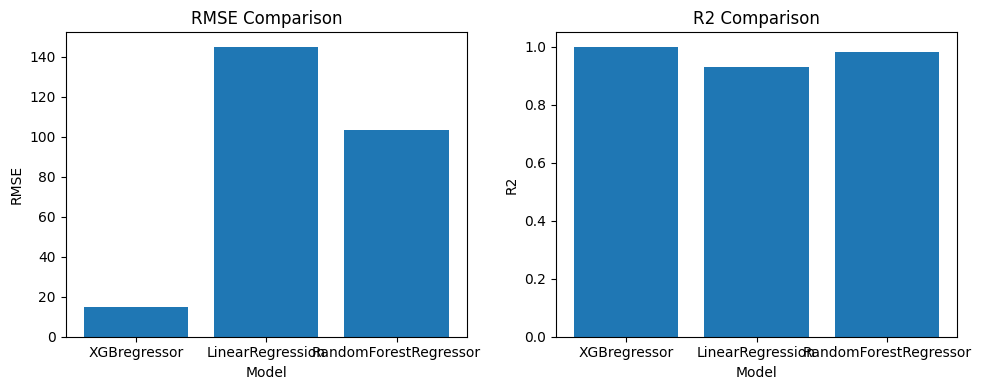

In [165]:
# Visualize the results :
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Plot RMSE:
axes[0].bar(results_df["Model"], results_df["RMSE"])
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")
axes[0].set_title("RMSE Comparison")

# Plot R2
axes[1].bar(results_df["Model"], results_df["R2"])
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")
axes[1].set_title("R2 Comparison")

plt.tight_layout()
plt.show()

So our best model is XGBRegressor

Finally, this is the time to make prediction on the test Dataset



In [166]:
model = models[0][1]
model.fit(X_train, y_train)
# Get the feature names the model expects
expected_features = model.get_booster().feature_names

# Check for missing columns and handle them
missing_cols = set(expected_features) - set(test_df.columns)
if missing_cols:
    print("Warning: The following features are missing in test_df:", missing_cols)
    # Handle missing columns (e.g., impute, drop, or raise an error)
    # Example: Filling missing columns with 0
    test_df[list(missing_cols)] = 0

# Ensure test_df has the same features in the same order
test_df = test_df[expected_features]

# Now predict using the re-ordered test_df
y_pred = model.predict(test_df)
y_pred

array([130760.71 , 153874.53 , 187407.66 , ..., 155544.22 , 114222.055,
       215072.06 ], dtype=float32)

In [168]:
# Save prediction in a csv file
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('submission3.csv', index=False)

In [169]:
# Upload submission file
from google.colab import files
files.download('submission3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>